In [1]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np

Using plaidml.keras.backend backend.


In [2]:
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()
train_images.shape, test_images.shape
train_images = train_images/255.0
test_images = test_images/255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

'deer'

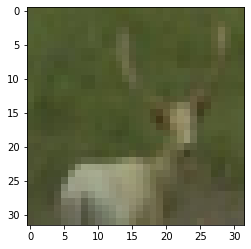

In [3]:
index = 180
plt.imshow(train_images[index])
class_names[int(train_labels[index]) ]

In [4]:
! pip install pillow

In [5]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img(train_images)
# convert to numpy array
data = img_to_array(train_images[index])
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [50]:
train_images = train_images/255.0
test_images = test_images/255.0

In [51]:
model = Sequential([
    Flatten(input_shape = (32,32,3)),
    Dense(128, activation = "relu"),
    Dense(10,activation = "softmax")
]
)

In [52]:
model.compile(
    optimizer = "Adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [53]:
model.fit(train_images,train_labels, epochs = 20)

Epoch 1/20
50000/50000 [==============================] - 7s 135us/step - loss: 2.0357 - acc: 0.2696
Epoch 2/20
50000/50000 [==============================] - 7s 130us/step - loss: 1.8830 - acc: 0.3329
Epoch 3/20
50000/50000 [==============================] - 6s 128us/step - loss: 1.8276 - acc: 0.3536
Epoch 4/20
50000/50000 [==============================] - 6s 116us/step - loss: 1.7840 - acc: 0.3692
Epoch 5/20
50000/50000 [==============================] - 7s 133us/step - loss: 1.7485 - acc: 0.3799
Epoch 6/20
50000/50000 [==============================] - 7s 130us/step - loss: 1.7179 - acc: 0.3946
Epoch 7/20
50000/50000 [==============================] - 6s 119us/step - loss: 1.6896 - acc: 0.4048
Epoch 8/20
50000/50000 [==============================] - 6s 117us/step - loss: 1.6649 - acc: 0.4120
Epoch 9/20
50000/50000 [==============================] - 6s 117us/step - loss: 1.6427 - acc: 0.4216
Epoch 10/20
50000/50000 [==============================] - 6s 119us/step - loss: 1.6236 - a

model.evaluate(test_iamges,test_labels)

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________
